<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Juypter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Angewandte Geophysik II: Kap 3: Kugelfunktionen
# Kubische Gleichungen
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*

In [58]:
import numpy as np
import cmath
import matplotlib.pyplot as plt
from ipywidgets import interactive, fixed
import ipywidgets as widgets

Eine **kubische Gleichung** hat die Form:
$$
a x^3 + b x^2 + c x + d = 0
$$
mit $a$, $b$, $c$ und $d$ den Koeffizienten.

In [61]:
def f(x,a,b,c,d):
    y = a*x**3 + b*x**2 + c*x + d
    return y

def plot_cubic(x,a,b,c,d):
    # plot    
    function='f(x)='+str(round(a,2))+'x$^3$+'+str(round(b,2))+'x$^2$+'+str(round(c,2))+'x+'+str(round(d,2))
    plt.figure(figsize=(8,4))
    plt.plot(x,f(x,a,b,c,d),linestyle='solid',color='red',linewidth=4,label=function)
    plt.legend()
    plt.grid()

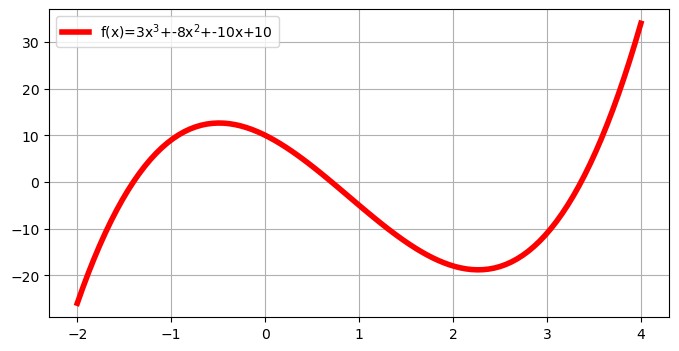

In [62]:
x = np.linspace(-2,4,101)
a,b,c,d = 3,-8,-10,10
#a,b,c,d = 1,0,0,0

#a=b1/a1
#b=c1/a1
#c=d1/a1
plot_cubic(x,a,b,c,d)

----
## Normalenform

Dividieren wir die Gleichung durch $a$, folgt die **Normalenform**:
$$
x^3 + {b \over a} x^2 + {c \over a} x + {d \over a} = 0
$$

----
## Zerlegung in Linearfaktoren

Die **Kubische Gleichung**
$$
a x^3 + bx^2 + cx + d=0
$$
kann in **Linearfaktoren** zerlegt werden:
$$
a (x-x_1) (x-x_2) (x-x_3)= 0
$$

----
## Nullstellen

Die Anzahl der Nullstellen kann durch die *Diskriminante* $D$ bestimmt werden:
$$
D=R^2 - Q^3
$$
mit
$$
\begin{array}{rcl}
Q &=& \frac{{b \over a}^2−3{c \over a}}{9} \\
R &=& \frac{2{b \over a}^3−9 {b \over a}{c \over a} +27{d \over a}}{54}
\end{array}
$$

Es gilt
- $D>0$: Eine reelle Lösung $x_1$ und zwei komplexe Lösungen
- $D=0$: Drei reelle Lösungen, mindestens zwei gleich $x_1$, $x_2$
- $D<0$: Drei reelle Lösungen $x_1$, $x_2$, $x_3$



In [63]:
def discriminant(a,b,c,d):
    Q = ((b/a)**2 - 3*(c/a)) / 9.
    R = (2*(b/a)**3 - 9*(b/a)*(c/a) + 27*(d/a)) / 54.
    D = R**2 - Q**3
    return D,Q,R

In [64]:
D,Q,R = discriminant(a,b,c,d)
print('discriminant: ',D)

discriminant:  -6.604938271604938


----
## $D<0$: Drei reelle Nullstellen

$$
\begin{array}{rcl}
x_1 &=& - \left[ 2 \sqrt{Q} \cos \left( \frac{\theta}{3} \right) \right] - \frac{a}{3} \\
x_2 &=& - \left[ 2 \sqrt{Q} \cos \left( \frac{\theta + 2\pi}{3} \right) \right] - \frac{a}{3} \\
x_3 &=& - \left[ 2 \sqrt{Q} \cos \left( \frac{\theta - 2\pi}{3} \right) \right] - \frac{a}{3}
\end{array}
$$

In [65]:
if (D < 0):
    theta = np.arccos(R/np.sqrt(Q**3))
    x1 = -(2*np.sqrt(Q)*np.cos(theta/3.)) - (b/a)/3.
    x2 = -(2*np.sqrt(Q)*np.cos((theta+2*np.pi)/3.)) - (b/a)/3.
    x3 = -(2*np.sqrt(Q)*np.cos((theta-2*np.pi)/3.)) - (b/a)/3.
    roots = [x1,x2,x3]
elif (D >= 0):
    S = np.cbrt(-R + np.sqrt(D))
    T = np.cbrt(-R - np.sqrt(D))
    x1 = S + T - (b/a)/3.
    roots = [x1]
print('coeff: ',a,b,c,d)
print('roots: ',roots)
# use numpy.roots()
roots1 = np.roots([a,b,c,d])
print('roots: ',roots1)

coeff:  3 -8 -10 10
roots:  [-1.402923563655503, 3.363102483760517, 0.7064877465616525]
roots:  [ 3.36310248 -1.40292356  0.70648775]


In [66]:
def plot_cubic_roots(x,roots,a,b,c,d):
    # plot
    function='f(x)='+str(round(a,2))+'x$^3$+'+str(round(b,2))+'x$^2$+'+str(round(c,2))+'x+'+str(round(d,2))
    plt.figure(figsize=(8,4))
    plt.plot(x,f(x,a,b,c,d),linestyle='solid',color='red',linewidth=4,label=function)
    plt.plot(roots,np.zeros(len(roots)),lw=0,marker='o',markersize=10)
    plt.plot(np.roots([a,b,c,d]),np.zeros(len(np.roots([a,b,c,d]))),lw=0,marker='x',markersize=10)
    plt.legend()
    plt.grid()

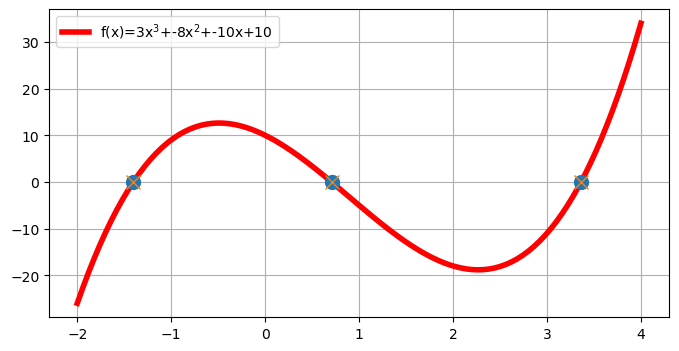

In [67]:
plot_cubic_roots(x,roots,a,b,c,d)

----
## Interaktive Darstellung

In [68]:
def plot_cubic_interact(minmax,a,b,c,d):
    xmin=minmax[0];xmax=minmax[1]
    x = np.linspace(xmin,xmax,51)
    y = f(x,a,b,c,d)
    # get roots
    x0 = np.roots([a,b,c,d])
    #print('roots: ',x0)
    function='f(x)='+str(round(a,2))+'x$^3$+'+str(round(b,2))+'x$^2$+'+str(round(c,2))+'x+'+str(round(d,2))
    plt.figure(figsize=(8,6))
    plt.xlim([xmin,xmax])
    plt.ylim([-4,14])
    plt.plot([xmin,xmax],[0,0],color='grey')
    plt.plot(x,y,label=function)
    plt.plot(x0,f(x0,a,b,c,d),linewidth='0',marker='.',markersize=40,label='Nullstellen')
    function='f(x)='+str(a)+'x$^3$+'+str(b)+'x$^2$+'+str(c)+'x'+str(d)
    plt.legend()

In [69]:
w = dict(
minmax=widgets.FloatRangeSlider(min=-10,max=10,step=1,value=[-4,4],continuous_update=False,description='xmin'),
    a=widgets.FloatSlider(min=-10,max=10,step=0.5,value=3,description='a'),
    b=widgets.FloatSlider(min=-10,max=10,step=0.5,value=-8,description='b'),
    c=widgets.FloatSlider(min=-10,max=10,step=0.5,value=-10,description='c'),
    d=widgets.FloatSlider(min=-10,max=10,step=0.5,value=10,description='d'),
)

output = widgets.interactive_output(plot_cubic_interact, w)
box = widgets.HBox([widgets.VBox([*w.values()]), output])

display(box)

## Lösungen (alt)

Die Lösungen der kubischen Gleichung lassen sich folgendermaßen berechnen:

- Numerisch (s.o.)

- Analytisch

Es gibt eine ganze Reihe von analytischen Lösungsverfahren für kubische Gleichungen. Viele führen 
das kubische Polynom zurück auf eine reduzierte Form (ohne den quadratischen Term).

Eine Lösung (nutze komplexe Zahlen!):

$$
\begin{array}{rcl}
d_0 &=& b^2 - 3ac \\
d_1 &=& 2b^3 -9abc + 27a^2d \\
C   &=& \left( \frac{d_1 \pm \sqrt{d_1^2-4d_0^3}}{2} \right)^{{1}\over{3}} \\
\zeta &=& \frac{-1 + \sqrt{-3}}{2} \\
x^0_k &=& -\frac{1}{3a} \left( b + \zeta^k C + \frac{d_0}{\zeta^k C} \right), k \in[0,1,2]
\end{array}
$$

In [55]:
d0 = b**2 - 3*a*c
d1 = 2*b**3 -9*a*b*c + 27.*a**2*d
C  = ((d1 + cmath.sqrt(d1**2-4.*d0**3))/2.)**(1./3.)
zeta=(-1.+cmath.sqrt(-3.))/2.

x0k = np.empty(3,dtype='complex')
for k in range(3):
    x0k[k] = -1./(3*a) * (b + zeta**k*C + d0/zeta**k/C)
print(x0k.real)
print(x0k.imag)

[-1.40292356  3.36310248  0.70648775]
[ 2.96059473e-16  2.96059473e-16 -1.18423789e-15]


## Beispiele

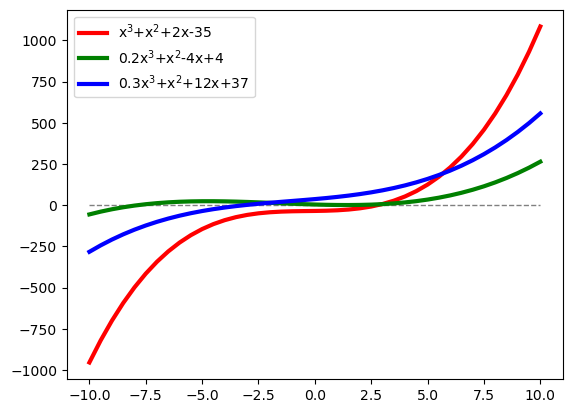

In [56]:
import numpy as np
import cmath
import matplotlib.pyplot as plt
# define functions
x = np.linspace(-10,10,41)
y1 = x**3 + x**2 + 2*x - 35
y2 = 0.2*x**3 + x**2 -4*x + 4
y3 = 0.3*x**3 + x**2+12*x+37
# plot functions
plt.plot([-10,10],[0,0],linestyle='dashed',color='grey',linewidth=1)
plt.plot(x,y1,linestyle='solid',color='red',linewidth=3,label='x$^3$+x$^2$+2x-35')
plt.plot(x,y2,linestyle='solid',color='green',linewidth=3,label='0.2x$^3$+x$^2$-4x+4')
plt.plot(x,y3,linestyle='solid',color='blue',linewidth=3,label='0.3x$^3$+x$^2$+12x+37')
plt.legend()
plt.show()

... done